# **Customer Segmentation via Clustering in Mailing Campaigns: A Data Science Approach for Marketing**

## Introduction

In this project, we begin with an **EDA (Exploratory Data Analysis)** to examine the **dataset** provided. The goal of this phase is to ensure that the **variables** are accurate, identify potential **data inconsistencies**, and detect the presence of **outliers**.

Afterward, we will apply **unsupervised learning algorithms** to segment customers from an email **marketing campaign**. The objective is to classify users based on their interaction with emails (opens, clicks, etc.) and uncover patterns that may be valuable to the **marketing** team.

It is important to note that the **dataset** was provided without any reference to the meaning of its columns, the possible values, or how they should be interpreted. Therefore, part of the initial analysis focuses on inferring the meaning and validity of each variable.

During the analysis, we will create **new variables** to enrich the **clustering** process. Using **clustering techniques**, we aim to divide users into groups (clusters) with similar behaviors, without relying on any prior hypotheses.

In the final stage, the generated clusters will be analyzed to identify characteristics that may be useful from a marketing perspective. This will allow us to make specific recommendations to improve future email campaigns, based on the behavior of each customer segment.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/Ezegarcia07/Email-Engagement-Clustering/refs/heads/main/clustering_mailing%20-%20Sheet1.csv"
df = pd.read_csv(url)
df.sample(5)

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week
174035,1774257,1,0,0,0,1,1,21,0
97383,1024988,11,0,0,0,11,1,21,"4,090909091"
10849,251913,7,0,0,0,7,0,"20,42857143","1,857142857"
11009,1178079,4,0,0,0,4,0,17,"3,5"
103790,524441,7,0,0,0,7,1,"19,28571429","1,142857143"


In [3]:
df.head()

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week
0,2044163,4,0,0,0,4,0,17,"3,5"
1,633731,1,0,0,0,1,0,21,4
2,1537126,4,0,0,0,4,0,17,"3,5"
3,1960135,3,0,0,0,3,0,"15,33333333","3,333333333"
4,1004992,8,0,1,0,10,1,"18,22222222",2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212292 entries, 0 to 212291
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Id           212292 non-null  int64 
 1   send         212292 non-null  int64 
 2   bounce       212292 non-null  int64 
 3   open         212292 non-null  int64 
 4   click        212292 non-null  int64 
 5   Total        212292 non-null  int64 
 6   Comprador    212292 non-null  int64 
 7   hour         212292 non-null  object
 8   day_of_week  212292 non-null  object
dtypes: int64(7), object(2)
memory usage: 14.6+ MB


In [5]:
df.describe()

,Id,send,bounce,open,click,Total,Comprador
count,2.122920e+05,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000
mean,1.062074e+06,3.757801,0.264273,0.483819,0.072108,4.680077,0.616542
std,6.119871e+05,3.838834,0.665326,1.564734,0.607759,4.964009,0.486229
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.336052e+05,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,1.062491e+06,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,1.592284e+06,5.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,2.122907e+06,167.000000,55.000000,174.000000,106.000000,390.000000,1.000000


In [6]:
df.isna().sum()

,0
Id,0
send,0
bounce,0
open,0
click,0
Total,0
Comprador,0
hour,0
day_of_week,0


#### Initial Conclusion

An initial conclusion drawn from the first analysis is that, when using the `head()` command, an **inconsistency** is observed in row 4. The value in the **Total** column is 10, but there is no possible combination with the other variables (excluding the **Comprador** column, which is binary, and the **hour** and **day_of_week** columns) that justifies this total.

It is necessary to investigate whether this issue occurs in other rows of the dataset. Therefore, we will conduct a more detailed analysis to determine how many rows present this same type of inconsistency.



In [7]:
check_total = df['send'] + df['open'] + df['click'] + df["bounce"] #+ df["Comprador"]
is_total_correct = df['Total'] == check_total

summary = pd.DataFrame({
    'Total': df['Total'],
    'Computed_Total': check_total,
    'Is_Correct': is_total_correct
})

print(summary['Is_Correct'].value_counts())
summary.head()


Is_Correct
True     197009
False     15283
Name: count, dtype: int64


,Total,Computed_Total,Is_Correct
0,4,4,True
1,1,1,True
2,4,4,True
3,3,3,True
4,10,9,False


#### Processing the `Total` Column

It is clearly observed that there are more than **fifteen thousand records** where the sum of the columns **send**, **open**, **click**, and **bounce** does not match the value in the **Total** column. Therefore, it will be necessary to process the **Total** column.

The strategy will be to **remove** the **Total** column and instead create a new variable called **real_total**, which will represent the sum of the **send**, **bounce**, **open**, and **click** columns. Together, these columns reflect the total interactions we have with each customer.

In [8]:
df['real_total'] = df['send'] + df['open'] + df['click'] + df["bounce"]

df = df.drop(columns=['Total'])

cols = df.columns.tolist()
cols.insert(5, cols.pop(cols.index('real_total')))

df = df[cols]

df.head()

,Id,send,bounce,open,click,real_total,Comprador,hour,day_of_week
0,2044163,4,0,0,0,4,0,17,"3,5"
1,633731,1,0,0,0,1,0,21,4
2,1537126,4,0,0,0,4,0,17,"3,5"
3,1960135,3,0,0,0,3,0,"15,33333333","3,333333333"
4,1004992,8,0,1,0,9,1,"18,22222222",2


#### Analysis of Inconsistencies in `day_of_week` and `hour`

The second conclusion we can draw from the initial analysis is the presence of the value **3.333333** in the **day_of_week** column, which clearly represents an **inconsistency**. This value is not meaningful, and therefore, the corresponding row will be **dropped**.

Regarding the **hour** column, it could make sense if it represented the exact time a single email was sent. However, we observed that some customers received more than one email. For example, **ID 1960135** received 3 emails at **15.3333 hours** and on **day of the week 3.3333333**.

This raises questions, as it is unclear how this data was represented. It is possible that these variables reflect an **average** of the hours and days. For instance, ID 1960135 might have received emails on days 2, 3, and 5, resulting in an average of **3.3333333** in the **day_of_week** column.

Since these inconsistencies do not provide useful information, both **day_of_week** and **hour** columns will be **dropped**.

In [9]:
drop_columns = ['hour', 'day_of_week']
df.drop(drop_columns, axis=1, inplace=True)
df.head(10)

,Id,send,bounce,open,click,real_total,Comprador
0,2044163,4,0,0,0,4,0
1,633731,1,0,0,0,1,0
2,1537126,4,0,0,0,4,0
3,1960135,3,0,0,0,3,0
4,1004992,8,0,1,0,9,1
5,1598931,2,0,0,0,2,1
6,2027234,1,1,0,0,2,0
7,34136,5,0,5,2,12,1
8,1440219,2,0,0,0,2,1
9,41994,7,0,7,2,16,0


#### Analysis of the `Comprador` Variable

Now let's analyze the **Comprador** variable (means "Buyer"). This variable indicates whether a customer made a purchase, taking binary values: **1** means the customer made a purchase, and **0** means they did not.

One possible issue we need to verify is whether there are any customers with a value of **1** in the **Comprador** variable but who did not interact with any email. In other words, we are asking whether there are cases where a customer made a purchase without having opened or clicked on any email.

Let's review these cases.

In [10]:
no_interaction_buyers = df.query("Comprador == 1 and open == 0 and click == 0")
print(no_interaction_buyers.shape)
no_interaction_buyers.head()

(96110, 7)


,Id,send,bounce,open,click,real_total,Comprador
5,1598931,2,0,0,0,2,1
8,1440219,2,0,0,0,2,1
12,354737,2,0,0,0,2,1
18,928624,7,0,0,0,7,1
20,352644,18,0,0,0,18,1


#### 🔍 Analysis of Buyers Without Email Interaction

Indeed, we observed that in **more than 96,000 cases**, there are customers who **made a purchase** but **did not interact** with any of the emails sent.

##### ❓ How is this possible?

Since the dataset was provided **without clear references** regarding its creation or the meaning of the variables, we can **propose a hypothesis**:  
📌 **A customer may have completed a purchase on the brand’s official website without needing to interact with any emails.**

##### ✅ Conclusion:

The fact that these customers made purchases **without opening or clicking on emails** suggests that their purchase decisions were **not directly influenced by email marketing campaigns**, but rather likely came from **other channels**, such as:  
- **Direct traffic to the website**  
- **Advertising in other media**  
- **Referrals or word of mouth**



### Transformación del DataFrame para la Clusterización

En esta etapa, vamos a crear tres variables de interés que nos ayudarán a obtener información sobre las interacciones de los clientes con los correos electrónicos.

##### 📌 Descripción de las Variables Creadas

- **`open_rate`** = `open / (send - bounce)`  
  - Representa la **tasa de apertura** de los emails considerando solo los correos **entregados** (descontando los que rebotaron).  
  - Indica el **porcentaje** de correos que fueron abiertos por el usuario.

- **`CTR` (Click-Through Rate)** = `click / open`  
  - Mide la **efectividad** del email en generar clics entre los usuarios que lo abrieron.  
  - Un valor alto sugiere que el contenido del correo es **atractivo** y genera interacción.

- **`interaction_rate`** = `(open + click) / (send + open + click)`  
  - Representa el **nivel general de interacción** con los correos.  
  - Combina aperturas y clics en relación con el total de envíos y acciones realizadas.

Estas variables nos permiten **segmentar usuarios** según su nivel de interacción con los emails, ayudando a optimizar las estrategias de marketing. 🚀



In [11]:
df['open_rate'] = df['open'] / (df['send'] - df['bounce'])  # Adjusted Open Rate
df['CTR'] = df['click'] / df['open']  # Click-through rate
df['interaction_rate'] = (df['open'] + df['click']) / (df['send'] + df['open'] + df['click'])  # Total Interaction

In [12]:
df.sample(10)

,Id,send,bounce,open,click,real_total,Comprador,open_rate,CTR,interaction_rate
135783,574750,3,0,0,0,3,1,0.0,NaN,0.0
25565,1927352,1,1,0,0,2,0,NaN,NaN,0.0
65694,1637143,6,0,0,0,6,1,0.0,NaN,0.0
34839,1369839,1,1,0,0,2,0,NaN,NaN,0.0
35341,971710,1,0,0,0,1,1,0.0,NaN,0.0
168111,679222,2,0,0,0,2,1,0.0,NaN,0.0
152142,390527,6,0,0,0,6,1,0.0,NaN,0.0
206778,1750002,1,1,0,0,2,0,NaN,NaN,0.0
119982,1389317,4,0,0,0,4,0,0.0,NaN,0.0
190049,1865255,3,0,0,0,3,1,0.0,NaN,0.0


In [13]:
df.isna().sum()

,0
Id,0
send,0
bounce,0
open,0
click,0
real_total,0
Comprador,0
open_rate,39297
CTR,166102
interaction_rate,0


#### Handling Null Values

During the analysis, we found that there are **null values** in some of the variables. This is due to cases where the number of **send** and **bounce** is the same, which leads to a **division by zero**. Additionally, when no emails are opened, the **CTR** (Click-Through Rate) also results in a null value.

To address this, we will **fill those null values with zero**. This way, we prevent failed calculations from affecting the analysis and ensure that all variables have consistent numeric values.

The null-to-zero replacement process will be applied to the affected columns, ensuring that interaction metrics can be calculated correctly.



In [14]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [15]:
df.isna().sum()

,0
Id,0
send,0
bounce,0
open,0
click,0
real_total,0
Comprador,0
open_rate,0
CTR,0
interaction_rate,0


In [16]:
df.columns

Index(['Id', 'send', 'bounce', 'open', 'click', 'real_total', 'Comprador',
       'open_rate', 'CTR', 'interaction_rate'],
      dtype='object')

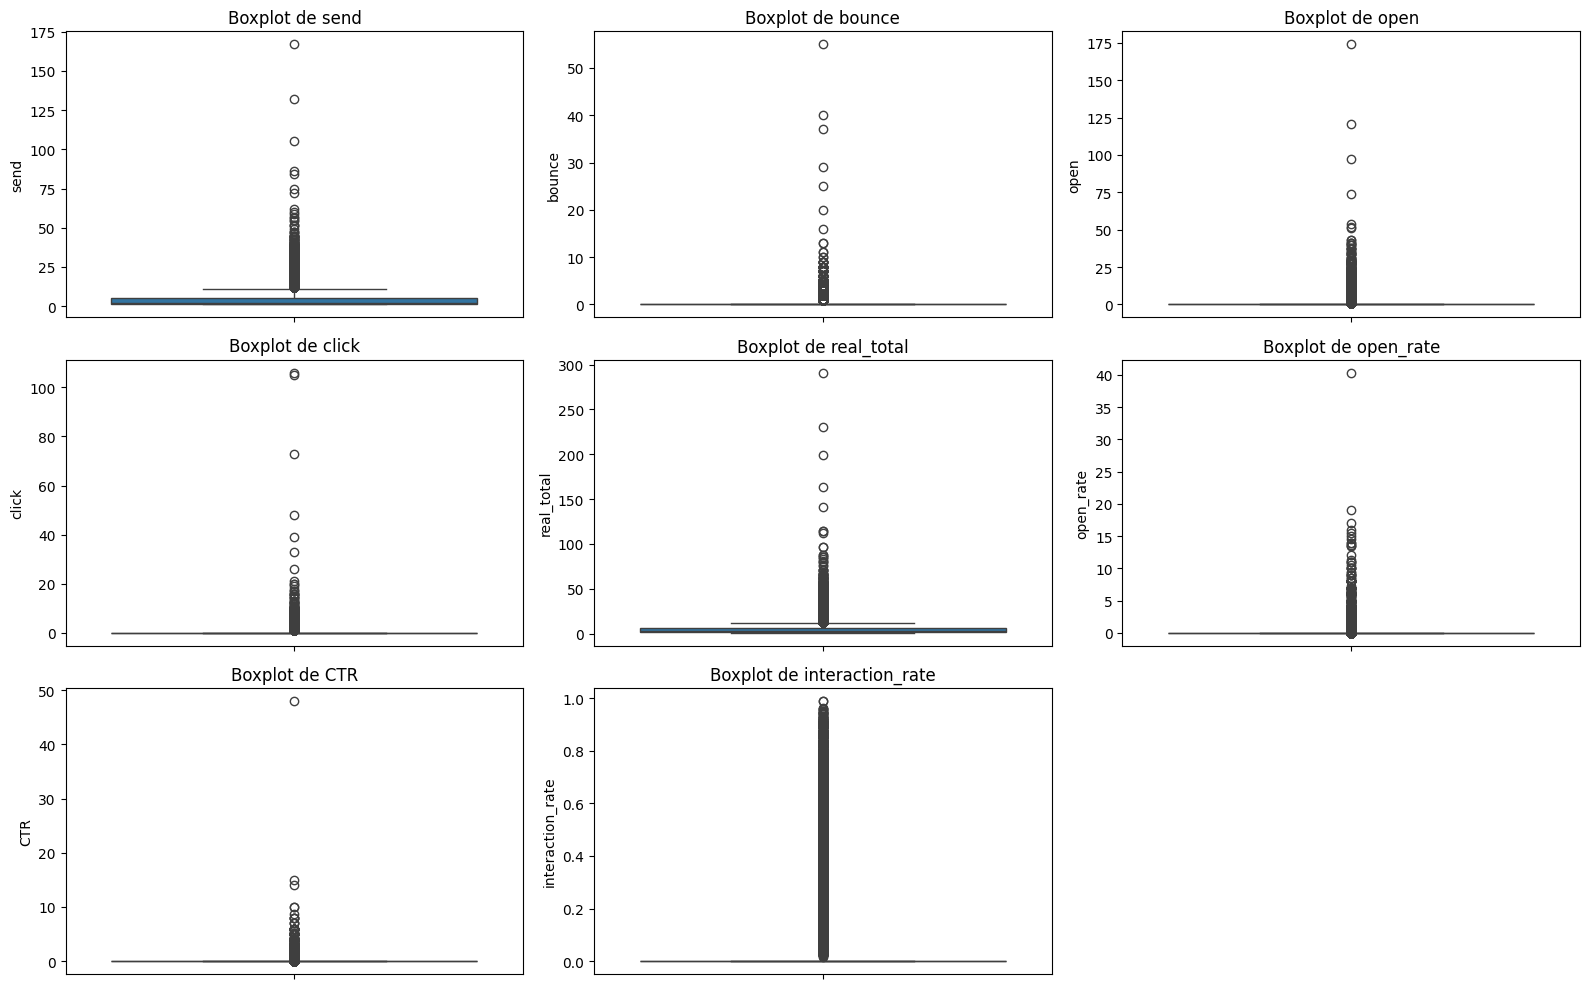

In [17]:
plt.figure(figsize=(16, 10))

plt.subplot(3, 3, 1)
sns.boxplot(y=df['send'])
plt.title('Boxplot de send')

plt.subplot(3, 3, 2)
sns.boxplot(y=df['bounce'])
plt.title('Boxplot de bounce')

plt.subplot(3, 3, 3)
sns.boxplot(y=df['open'])
plt.title('Boxplot de open')

plt.subplot(3, 3, 4)
sns.boxplot(y=df['click'])
plt.title('Boxplot de click')

plt.subplot(3, 3, 5)
sns.boxplot(y=df['real_total'])
plt.title('Boxplot de real_total')

plt.subplot(3, 3, 6)
sns.boxplot(y=df['open_rate'])
plt.title('Boxplot de open_rate')

plt.subplot(3, 3, 7)
sns.boxplot(y=df['CTR'])
plt.title('Boxplot de CTR')

plt.subplot(3, 3, 8)
sns.boxplot(y=df['interaction_rate'])
plt.title('Boxplot de interaction_rate')

plt.tight_layout()
plt.show()


#### Outlier Analysis

Based on the **boxplots** generated, we can observe that all variables exhibit **outliers**. However, what stands out the most are the variables we created, such as **`open_rate`** and **`CTR`**, which theoretically should have maximum values of **1**, but that is not the case.

This behavior is due to instances where the values for **open** or **click** exceed the number of **emails delivered**. This suggests that the **dataset** may be counting multiple interactions with the same email. In other words, a customer may have **opened the email more than once** or **clicked multiple times** on the same email.

Since the **dataset** does not specify whether these are multiple interactions, we will approach the analysis with this assumption in mind. It is important to find a way to handle these cases and better understand how customers interact with emails.


#### Strategy for Handling Outliers

To address this issue, we will take **two different approaches**:

1. **Keep the outliers** and apply **standardization techniques** to reduce their impact on the analysis. This way, we avoid removing information and simply adjust its influence on the model.

2. **Cap the values of the created variables** (`open_rate`, `CTR`, `interaction_rate`) so that they do not exceed **1**. This is based on the idea that a value of **1** represents the maximum level of interaction, without accounting for **multiple actions** (e.g., opening the same email more than once or clicking more times than there are emails available could be capped at 1 since it still indicates interaction).

Both methods will allow us to assess the best way to handle these inconsistencies and understand their impact on the final customer segmentation.


#### Variable Selection for Clustering

For the **clustering** process, we will use only **two created variables**:

- **`open_rate`**  
- **`CTR` (Click-Through Rate)**  

These two variables will allow us to perform effective **customer segmentation** based on their email interactions. We are particularly interested in analyzing:

✅ **Whether they opened the email** (`open_rate`).  
✅ **Whether they clicked on the content** (`CTR`), indicating they found the email body engaging.

By focusing on these metrics, we can classify customers according to their interaction level and define more effective marketing strategies for each group.


#### 🔹 First Approach: Keeping the Outliers

In this first approach, we decide **not to remove the outliers**, but to keep them as they are in the original dataset.

Since extreme values can influence clustering, we will apply **scaling techniques** to reduce their impact and ensure they do not dominate the segmentation process.

➡️ **Strategy:**  
1. **Do not remove or modify the outlier values.**  
2. **Scale** the `open_rate` and `CTR` variables using **MinMaxScaler**, which will transform values into the range `[0,1]`, maintaining the original distribution but reducing the influence of extreme values.  
3. Proceed with clustering using the transformed data.

This method will allow us to evaluate how **outliers** affect segmentation and whether they provide relevant information or simply introduce noise.


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_1 = df.copy()
df_1[['open_rate', 'CTR']] = scaler.fit_transform(df_1[['open_rate', 'CTR']])

df_1[['open_rate', 'CTR']].describe()


,open_rate,CTR
count,212292.000000,212292.000000
mean,0.003744,0.000703
std,0.011275,0.005507
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


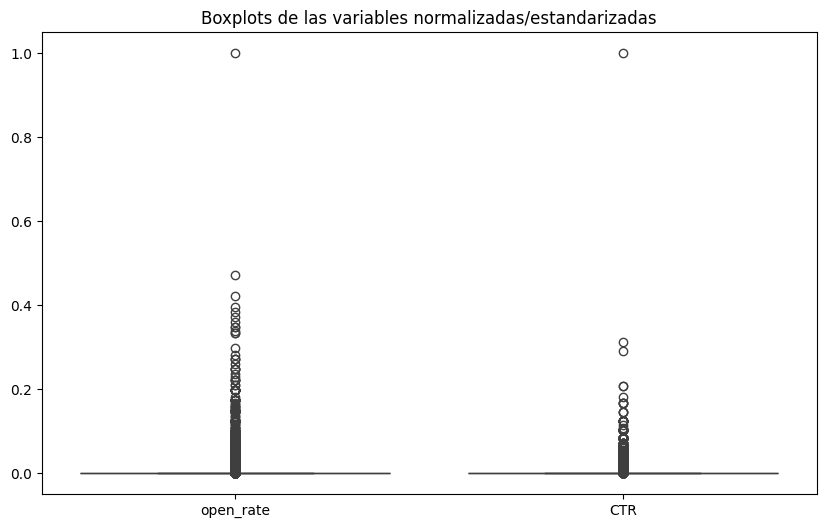

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(data=df_1[['open_rate', 'CTR']])
plt.title("Boxplots de las variables normalizadas/estandarizadas")
plt.show()


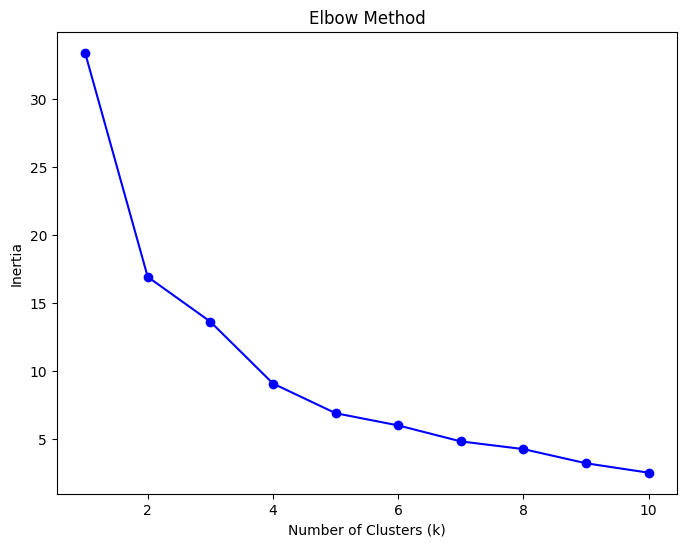

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_1[['open_rate', 'CTR']])
    inertia.append(kmeans.inertia_)

# Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()



In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)

clusters = kmeans.fit_predict(df_1[['open_rate', 'CTR']])

df_1['kmeans_cluster_1'] = clusters


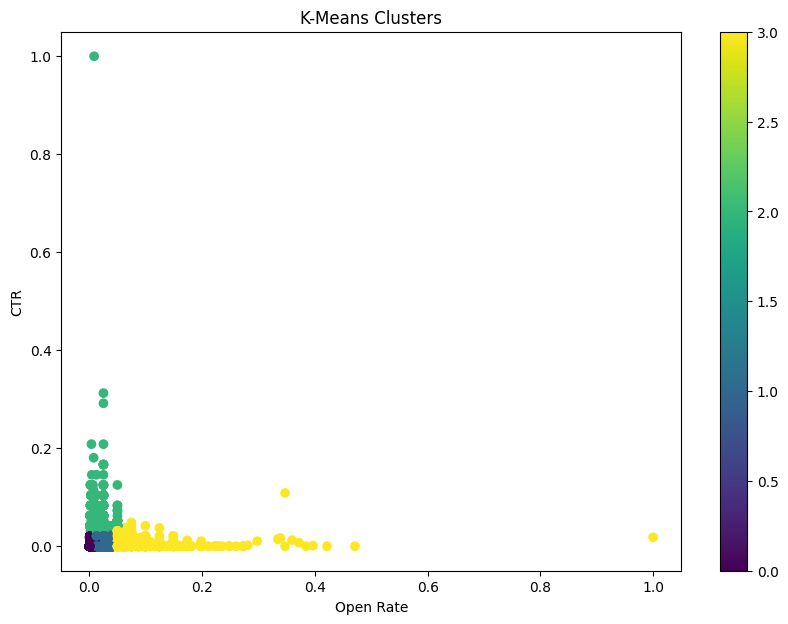

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(df_1['open_rate'],
            df_1['CTR'],
            c=df_1['kmeans_cluster_1'],
            cmap='viridis')
plt.xlabel('Open Rate')
plt.ylabel('CTR')
plt.title('K-Means Clusters')
plt.colorbar()
plt.show()

#### 📊 Analysis of the Impact of Outliers on Clustering

From the generated plot, we observe that **outliers** play an important role in clustering with **K-Means**.

##### 🔍 Main Issues Detected:
1. **Loss of information:**  
   - When applying **MinMaxScaler**, most of the data becomes **concentrated near 0**, which reduces variability and the model’s ability to differentiate meaningful segments.

2. **Poorly interpretable clusters:**  
   - The groups generated by **K-Means** **lack clear conceptual differentiation**.  
   - It is difficult to identify which customers **open the emails most** and **click the most**, as the **top-right corner of the plot is empty**.  
   - This suggests that the **outliers are distorting the distribution**, negatively affecting segmentation.


#### 🔄 Alternative: Using HDBSCAN

🔹 **Why HDBSCAN?**  
- It handles **computational cost** better compared to DBSCAN.  
- It works similarly to DBSCAN but automatically adjusts parameters to find a more stable segmentation.  
- It allows for **identifying noise and outliers**, which can help improve clustering.

We will try this approach and analyze if it yields better results in customer segmentation. 🚀


In [23]:
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt

hdb = hdbscan.HDBSCAN(min_samples=15, cluster_selection_epsilon=0.5)

df_1['hdbscan_cluster_1'] = hdb.fit_predict(df_1[['open_rate', 'CTR']])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


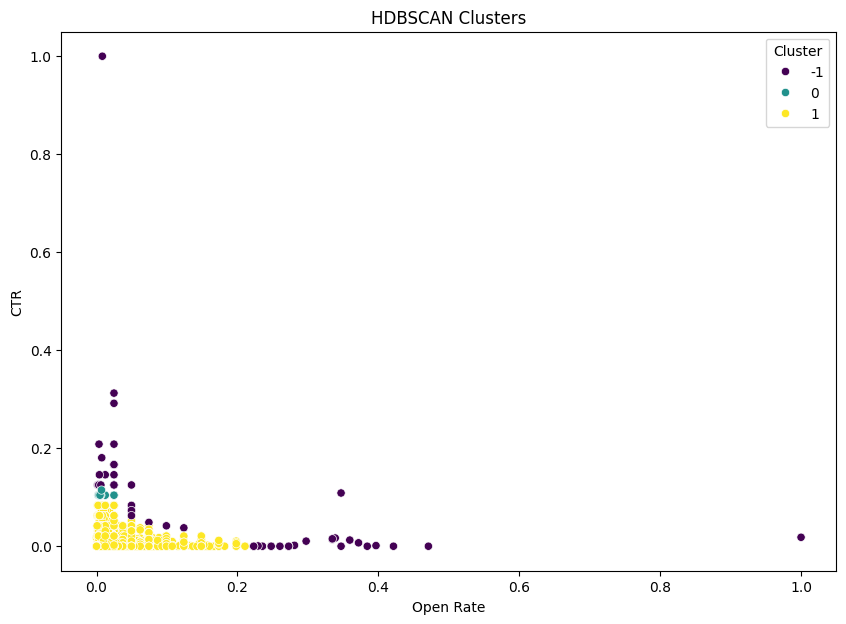

In [24]:
#import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

sns.scatterplot(x='open_rate',
                y='CTR',
                hue='hdbscan_cluster_1',
                data=df_1,
                palette='viridis')

plt.title("HDBSCAN Clusters")
plt.xlabel('Open Rate')
plt.ylabel('CTR')
plt.legend(title='Cluster')
plt.show()

#### ❌ Conclusion: HDBSCAN Also Does Not Work Well

The generated plots **do not provide much useful information**, mainly due to the presence of **outliers**.

🔍 **Observations:**  
- **HDBSCAN detects outliers**, but the remaining clusters **are not clear** and do not provide meaningful segmentation.  
- The result is similar to what we saw with **K-Means**, lacking useful conceptual differentiation for analysis.

📌 **Conclusion:** Keeping the outliers does not seem to be the best option. Let's move on to the **second approach**, where we will handle outliers before clustering. 🚀



#### 🔹 Second Approach: Capping Values Above 1

Since keeping the outliers **did not yield good results**, we will try a new strategy:

✅ **If a variable has a value greater than 1, we replace it with 1.**

📌 **Justification:**  
- This represents the **maximum possible interaction level**, without counting multiple actions by the same user (opening the same email multiple times or clicking multiple times on a single email).  
- We ensure that the data scale is more representative and does not distort clustering.

Let's see if this strategy improves customer segmentation. 🚀


In [25]:
df_2 = df.copy()
df_2[['open_rate', 'CTR']] = df_2[['open_rate', 'CTR']].clip(upper=1)

print(df_2[['open_rate', 'CTR']].describe())


           open_rate            CTR
count  212292.000000  212292.000000
mean        0.122080       0.024291
std         0.285255       0.141583
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max         1.000000       1.000000


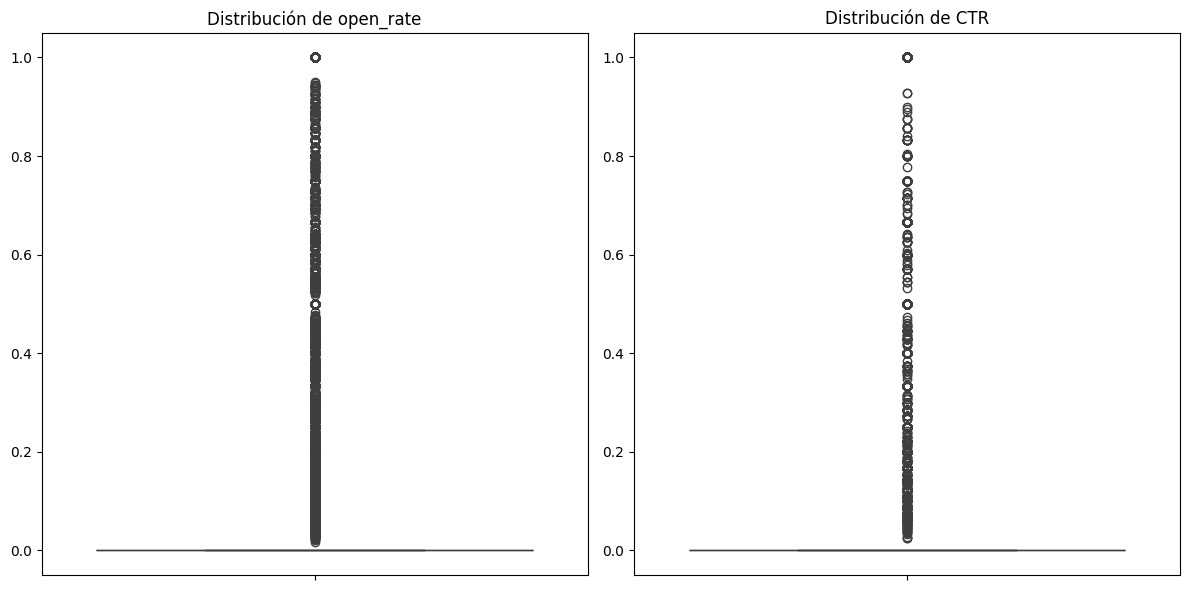

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

for i, col in enumerate(['open_rate', 'CTR'], 1):
    plt.subplot(1, 2, i)  # 1 fila, 2 columnas, posición i
    sns.boxplot(y=df_2[col])
    plt.title(f'Distribución de {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_2[['open_rate', 'CTR']] = scaler.fit_transform(df_2[['open_rate', 'CTR']])

print(df_2[['open_rate', 'CTR']].describe())


           open_rate            CTR
count  212292.000000  212292.000000
mean        0.122080       0.024291
std         0.285255       0.141583
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max         1.000000       1.000000


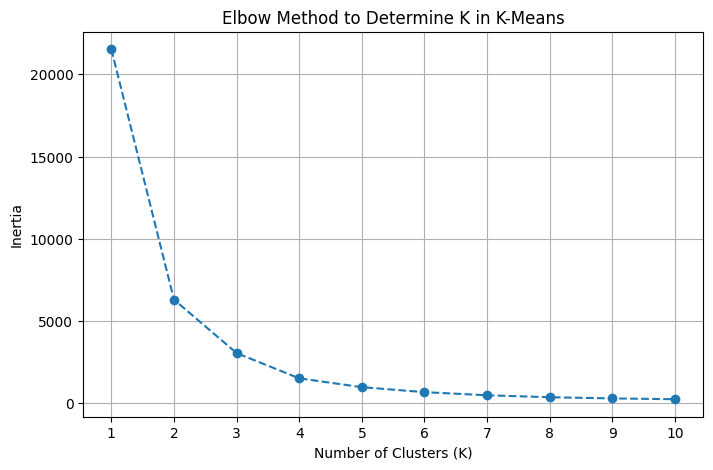

In [28]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

K_range = range(1, 11)
inertia_values = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_2[['open_rate', 'CTR']])
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine K in K-Means')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [29]:
best_k = 4

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_2['kmeans_cluster'] = kmeans.fit_predict(df_2[['open_rate', 'CTR']])


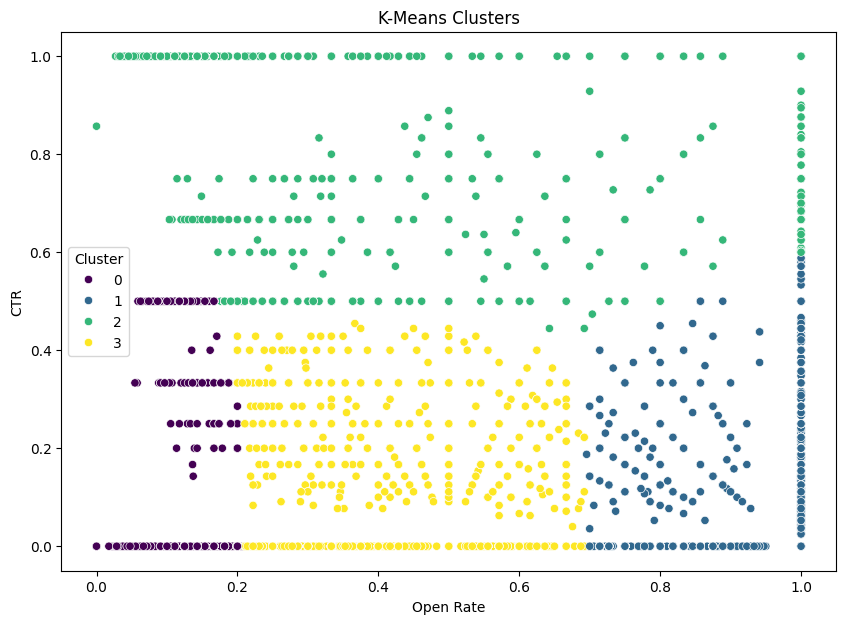

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

sns.scatterplot(x='open_rate',
                y='CTR',
                hue='kmeans_cluster',
                data=df_2,
                palette='viridis')

plt.title("K-Means Clusters")
plt.xlabel('Open Rate')
plt.ylabel('CTR')
plt.legend(title='Cluster')
plt.show()

## ✅ Results from the K-Means Plot

This plot makes **much more sense**. Now the clusters are clearly differentiated, allowing us to draw some initial conclusions from a **marketing** perspective:

- **Purple**: **Inactive or cold** customers who interact little or not at all with emails.  
- **Yellow**: Group with a **medium open rate**, but **few clicks**.  
- **Blue**: Group that **opens many emails** but clicks little or not at all.  
- **Green**: Customers who **click a lot** when they open emails, showing high engagement.

📊 **Preliminary conclusion**: We now have customer groups that we can address differently in our marketing campaigns.

Next, we will apply **HDBSCAN** to see if we obtain similar results and compare this approach with the **first approach**.



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


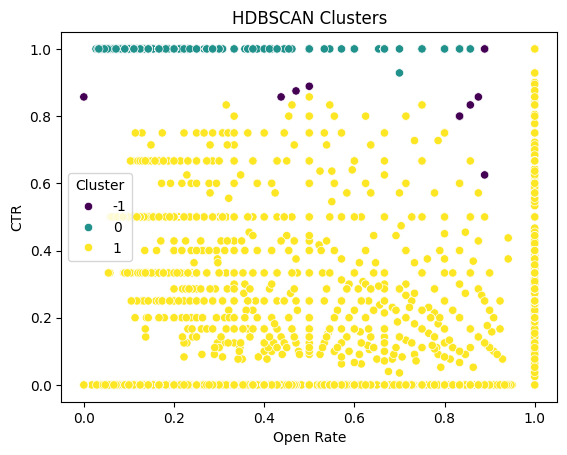

In [31]:
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt

hdb = hdbscan.HDBSCAN(min_samples=15, cluster_selection_epsilon=0.5)

df_2['hdbscan_cluster'] = hdb.fit_predict(df_2[['open_rate', 'CTR']])

sns.scatterplot(x='open_rate',
                y='CTR',
                hue='hdbscan_cluster',
                data=df_2,
                palette='viridis')

plt.title("HDBSCAN Clusters")
plt.xlabel('Open Rate')
plt.ylabel('CTR')
plt.legend(title='Cluster')
plt.show()

#### ❌ Results from the HDBSCAN Plot

This **HDBSCAN** plot does not provide the expected results. The clusters are as follows:

- **Yellow**: Almost all customers are in this group, suggesting a lack of significant differentiation among them.  
- **Purple**: This color corresponds to some **outliers**, but it is unclear how to interpret them in the segmentation context.  
- **Green**: Customers with a **CTR of 1**, indicating maximum interaction, but it doesn't offer much additional information.

📊 **Conclusion**: This approach does not produce useful or distinct clustering, making it a less efficient option for customer segmentation. We need to explore other alternatives or adjust **HDBSCAN** parameters to achieve better results.


## 🔄 Comparison of Approaches: K-Means vs HDBSCAN

After applying both clustering approaches, we reached the following conclusions:

### ✅ **Second Approach with K-Means**  
- Using **K-Means** with the adjustment of capping values greater than 1, we achieved a **clear clustering**.  
- **4 distinct clusters** that allow us to identify **customers with different behaviors** in terms of their interaction with emails:  
  - **Inactive or cold customers** (purple).  
  - **Customers with medium open rate** but few clicks (yellow).  
  - **Customers who open many emails** but don’t click much (blue).  
  - **Customers who click a lot when opening emails** (green).  
- These groups provide **valuable information** for **personalized marketing actions**.



## 📊 Marketing View Analysis of K-Means Clusters

### 📍 **Cluster 0 (Purple - Low Open Rate and Low CTR)**  
- **Characteristics**: These users have a **low open rate** and a **low CTR**.  
- **Conclusion**: They are **not very engaged** with the emails, likely **ignoring or not reviewing** them. They could be **disinterested users** or receiving **irrelevant content**.  
- **Recommended Actions**:  
  - Improve **email subject lines** to increase open rates.  
  - Consider **excluding them from some campaigns** to avoid unnecessary fatigue.

### 📍 **Cluster 1 (Blue - High Open Rate but Low CTR)**  
- **Characteristics**: These users **open many emails**, but **do not click** on links.  
- **Conclusion**: They show **interest in the emails**, but the content or offers inside are not attractive enough to click.  
- **Recommended Actions**:  
  - **Optimize content** to make it more engaging.  
  - Use **more eye-catching designs** and **personalized offers** to capture users' attention.

### 📍 **Cluster 2 (Green - Variable Open Rate and High CTR)**  
- **Characteristics**: **Highly engaged users** who open emails and click on links.  
- **Conclusion**: This is the **ideal audience**. They respond well to campaigns and show a **high level of interaction**.  
- **Recommended Actions**:  
  - **Maintain and nurture** these users.  
  - Send **exclusive content**, **VIP promotions**, or **loyalty programs** to strengthen relationships.

### 📍 **Cluster 3 (Yellow - Medium Open Rate and Variable CTR)**  
- **Characteristics**: Users with **mixed behavior**, showing medium open rates and variable CTR.  
- **Conclusion**: They are a **hesitant audience**. They interact **occasionally** but not consistently.  
- **Recommended Actions**:  
  - **Further segment this group** to understand their preferences.  
  - Test different types of **content** and **sending frequencies** to find the best approach.


## 🛠️ Incorporating the "comprador" Variable and Adding the K-Means Cluster

Although we already have a segmentation of customers based on their email interactions, the **`comprador`** variable can provide additional and relevant information about each cluster. However, **why wasn't it directly incorporated into the clustering algorithms?**

The main reason is that **`comprador`** is a **binary** variable (1 or 0). Generally, binary variables are not directly integrated into clustering analysis because they can bias the segmentation. It is more useful to **incorporate it after performing the clustering** to enrich and **deepen the analysis of the identified groups**.

### 🔄 Process of Incorporating the "KMeans Cluster" Variable

Before integrating the **`comprador`** variable into the analysis, we will take the following step:  
We will **add** the **`kmeans_cluster`** variable from the DataFrame `df_2` (the one that generated the graph guiding our segmentation) to the original DataFrame. This will allow us to have the clusters **clearly assigned** to each customer and relate their interactions with the purchase status (the **`comprador`** variable).

From here, we will be able to perform a more detailed analysis, observing how buyers behave within each group and what marketing actions might be more effective based on this new dimension.


In [32]:
df['kmeans_cluster'] = df_2['kmeans_cluster'].values
df.head()

,Id,send,bounce,open,click,real_total,Comprador,open_rate,CTR,interaction_rate,kmeans_cluster
0,2044163,4,0,0,0,4,0,0.000,0.0,0.000000,0
1,633731,1,0,0,0,1,0,0.000,0.0,0.000000,0
2,1537126,4,0,0,0,4,0,0.000,0.0,0.000000,0
3,1960135,3,0,0,0,3,0,0.000,0.0,0.000000,0
4,1004992,8,0,1,0,9,1,0.125,0.0,0.111111,0


## 🏷️ Cluster References  

| Cluster | Color      | Description                              |
|---------|------------|------------------------------------------|
| 0       | 🟣 Purple  | Low open rate and low CTR                |
| 1       | 🔵 Blue    | High open rate but low CTR                |
| 2       | 🟢 Green   | Variable open rate and high CTR               |
| 3       | 🟡 Yellow  | Medium open rate and variable CTR         |



In [33]:
cluster_comprador = df.groupby('kmeans_cluster')['Comprador'].value_counts(normalize=True).unstack()

cluster_comprador


Comprador,0,1
kmeans_cluster,,
0,0.413529,0.586471
1,0.209059,0.790941
2,0.242283,0.757717
3,0.268461,0.731539


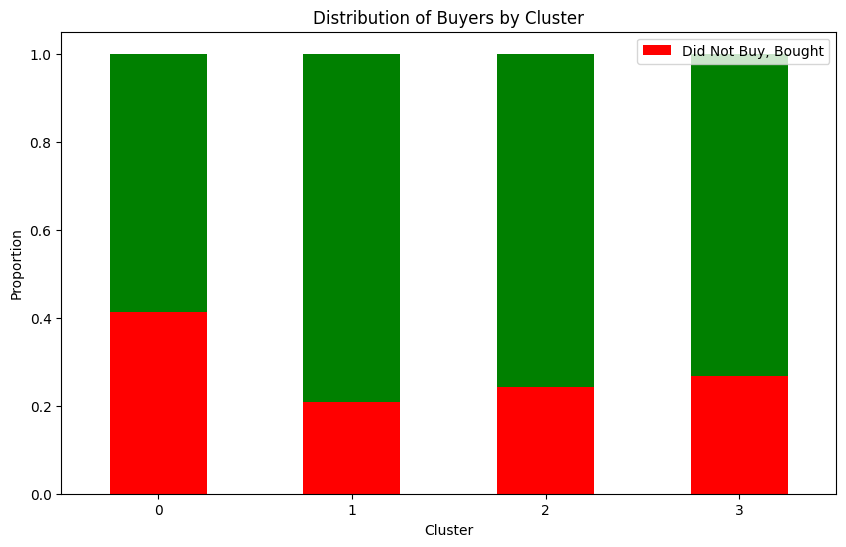

In [34]:
import matplotlib.pyplot as plt

# Create a Bar Chart to See the Proportion of Buyers in Each Cluster
cluster_comprador.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title('Distribution of Buyers by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(['Did Not Buy, Bought'])
plt.show()


# 📊 Conclusions Based on the Relationship Between Clusters and the `comprador` Variable

Below, we interpret the results based on the proportion of buyers (`comprador = 1`) and non-buyers (`comprador = 0`) in each cluster:

## 📍 Cluster 0 (🟣 Purple - Low Open Rate and Low CTR)
- **Buyer proportion:** 58.6%  
- **Non-buyer proportion:** 41.4%  

### 📌 Conclusion:
Although these users have **low interaction** with emails, surprisingly, **more than half end up buying** (58.6%).  
This indicates that even without much email engagement, they still **convert**.

### 🎯 Recommended action:
✅ Send them **fewer emails** but with more specific and persuasive content.  
✅ Try **other communication channels**, such as **SMS** or **push notifications**.

---

## 📍 Cluster 1 (🔵 Blue - High Open Rate but Low CTR)
- **Buyer proportion:** 79.1% 🚀  
- **Non-buyer proportion:** 20.9%  

### 📌 Conclusion:
This group **opens many emails** but does not click much. However, it is the group that **converts the most** (79.1%).  
This suggests that although they **do not interact with email links, they end up buying through other means**.

### 🎯 Recommended action:
✅ **Optimize email content** to improve the **CTR** and leverage their **high open rate**.  
✅ Send **exclusive offers** to further boost conversion.

---

## 📍 Cluster 2 (🟢 Green - Variable Open Rate and High CTR)
- **Buyer proportion:** 75.8%  
- **Non-buyer proportion:** 24.2%  

### 📌 Conclusion:
This is the group of users who are the **most highly engaged** (frequently open and click emails).  
**75.8% end up buying**, confirming that **this segment is the most valuable** and responds well to emails.

### 🎯 Recommended action:
✅ Continue sending **personalized campaigns** to this group.  
✅ Implement a **loyalty program** or exclusive discounts to retain them.

---

## 📍 Cluster 3 (🟡 Yellow - Medium Open Rate and Variable CTR)
- **Buyer proportion:** 73.1%  
- **Non-buyer proportion:** 26.8%  

### 📌 Conclusion:
This group has **medium email interaction** and a **good conversion rate** (73.1%).  
They may be a **segment in the process of loyalty building**.

### 🎯 Recommended action:
✅ Continue **segmenting** to understand what motivates their behavior.  
✅ Test **different types of content** and **sending frequencies**.
